**Import all the necessary packages**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

**Reading the CSV file**

In [22]:
# Data Preprocessing steps
data = pd.read_csv('bank-full.csv', delimiter=';')

**Display the first 10 records of dataset**

In [23]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


**A graphy how many loans are taken by people of different jobs & according to their age.**

In [15]:
import altair as alt
data = data.head(5000)
chart = alt.Chart(data).mark_bar().encode(
    x='age:O',
    y=alt.Y('count()', title='Loan'),  # Set the y-axis title here
    color='job:N',
).properties(height=400, width=800)
chart

alt.Chart(...)

**Assigning values to dependent variable & independent variable**

In [ ]:
# Assuming 'y' is the target variable
X = data.drop(columns=['y'])
y = data['y']

**Converting categorical values**

In [ ]:
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

**Train-test Data Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.**

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.**

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8740462235983634

Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.93      0.93      7952
         yes       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043


Confusion Matrix:
 [[7378  574]
 [ 565  526]]


**Display the Decision Tree**

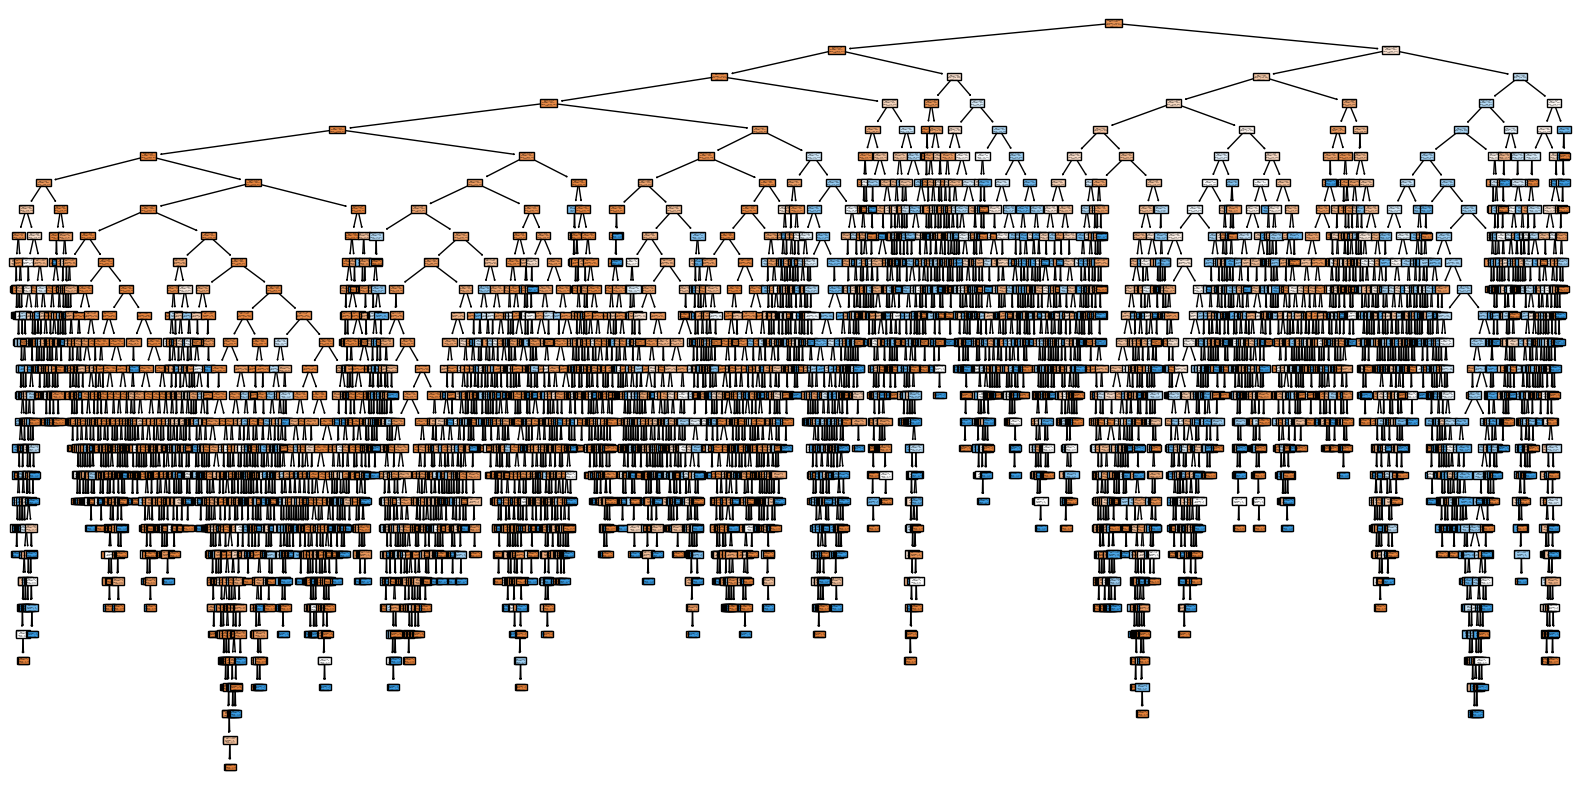

In [21]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()